In [2]:
# AI Model Sample - 鸢尾花分类示例
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("📚 AI模型示例 - 鸢尾花分类")
print("=" * 50)

📚 AI模型示例 - 鸢尾花分类


In [3]:
# 1. 数据加载和探索
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print("🌸 鸢尾花数据集信息:")
print(f"数据形状: {X.shape}")
print(f"特征名称: {feature_names}")
print(f"目标类别: {target_names}")
print(f"类别分布: {np.bincount(y)}")
print()

# 创建DataFrame便于查看数据
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = [target_names[i] for i in y]

print("📊 数据预览:")
print(df.head())

🌸 鸢尾花数据集信息:
数据形状: (150, 4)
特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
目标类别: ['setosa' 'versicolor' 'virginica']
类别分布: [50 50 50]

📊 数据预览:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


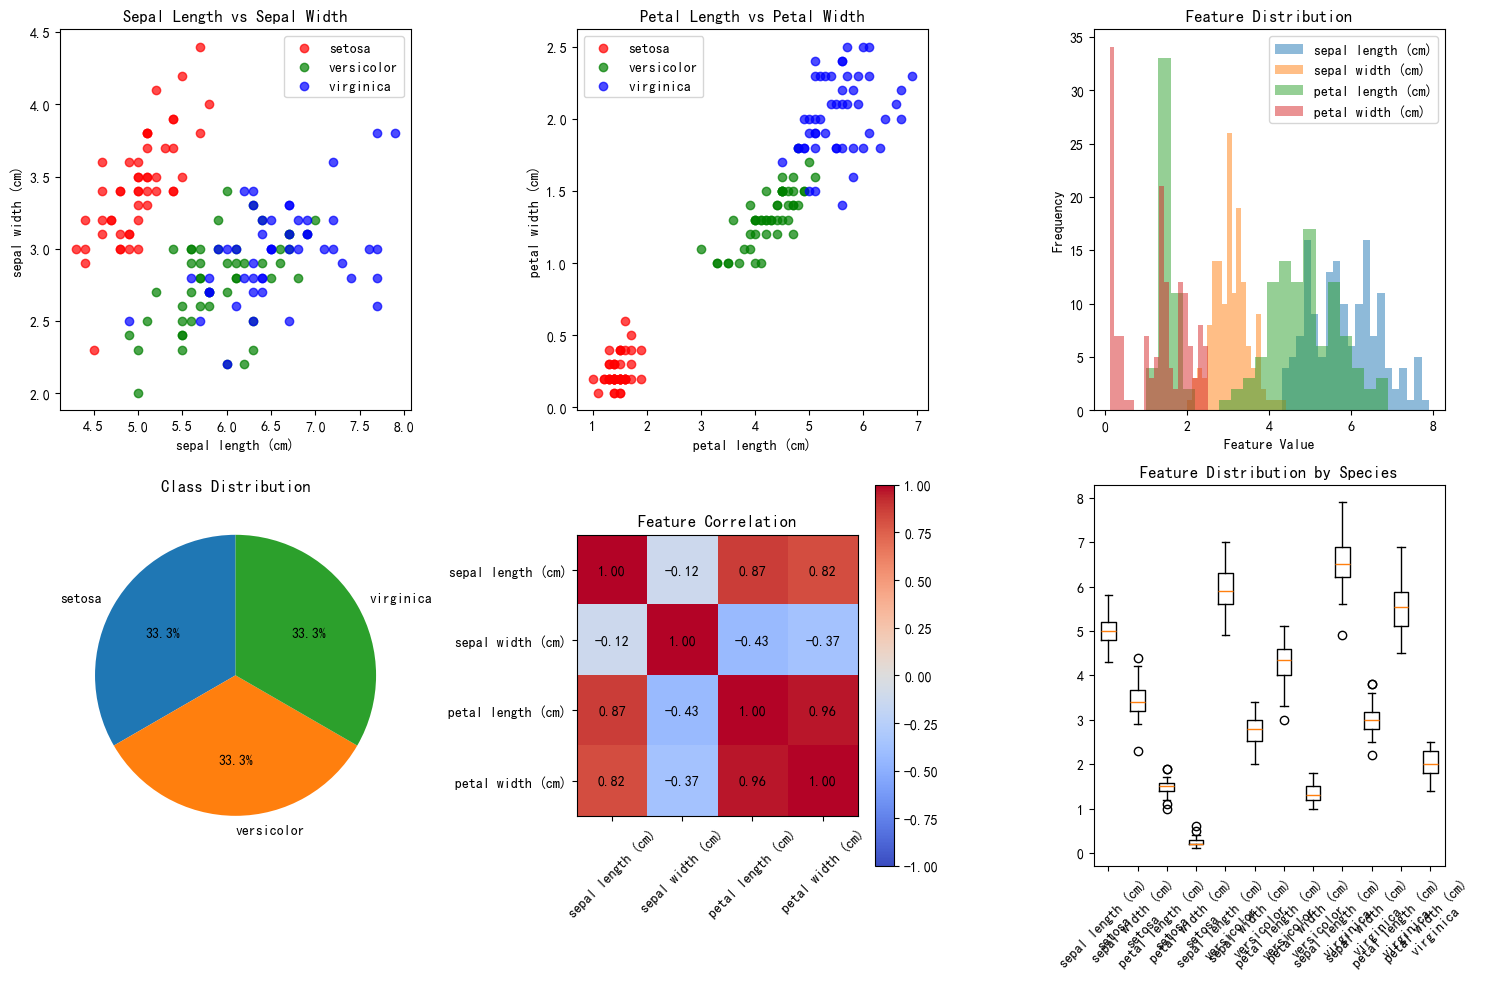

In [4]:
# 2. 数据可视化
plt.figure(figsize=(15, 10))

# 散点图矩阵
plt.subplot(2, 3, 1)
colors = ['red', 'green', 'blue']
for i, species in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=species, alpha=0.7, color=colors[i])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()

plt.subplot(2, 3, 2)
for i, species in enumerate(target_names):
    plt.scatter(X[y == i, 2], X[y == i, 3], label=species, alpha=0.7, color=colors[i])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()

# 特征分布直方图
plt.subplot(2, 3, 3)
for i, feature in enumerate(feature_names):
    plt.hist(X[:, i], alpha=0.5, label=feature, bins=20)
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Feature Distribution')
plt.legend()

# 类别分布饼图
plt.subplot(2, 3, 4)
class_counts = np.bincount(y)
plt.pie(class_counts, labels=target_names, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')

# 特征相关性热力图 (使用matplotlib替代seaborn)
plt.subplot(2, 3, 5)
correlation_matrix = df[feature_names].corr()
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.yticks(range(len(feature_names)), feature_names)
plt.title('Feature Correlation')

# 添加相关性数值
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black')

# 箱线图 (使用matplotlib替代seaborn)
plt.subplot(2, 3, 6)
data_for_box = []
labels_for_box = []
for i, species in enumerate(target_names):
    species_data = X[y == i]
    for j, feature in enumerate(feature_names):
        data_for_box.append(species_data[:, j])
        labels_for_box.append(f'{feature}\n{species}')

plt.boxplot(data_for_box, labels=labels_for_box)
plt.xticks(rotation=45)
plt.title('Feature Distribution by Species')

plt.tight_layout()
plt.show()


In [5]:
# 3. 数据预处理
print("🔧 数据预处理...")

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"训练集类别分布: {np.bincount(y_train)}")
print(f"测试集类别分布: {np.bincount(y_test)}")

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ 数据预处理完成!")
print(f"标准化前训练集均值: {X_train.mean(axis=0)}")
print(f"标准化后训练集均值: {X_train_scaled.mean(axis=0)}")
print(f"标准化后训练集标准差: {X_train_scaled.std(axis=0)}")


🔧 数据预处理...
训练集大小: (120, 4)
测试集大小: (30, 4)
训练集类别分布: [40 40 40]
测试集类别分布: [10 10 10]

✅ 数据预处理完成!
标准化前训练集均值: [5.84166667 3.04833333 3.77       1.205     ]
标准化后训练集均值: [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
标准化后训练集标准差: [1. 1. 1. 1.]


🤖 开始训练AI模型...
✅ 模型训练完成!
模型参数: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

📊 特征重要性:
sepal length (cm): 0.1143
sepal width (cm): 0.0058
petal length (cm): 0.4403
petal width (cm): 0.4396


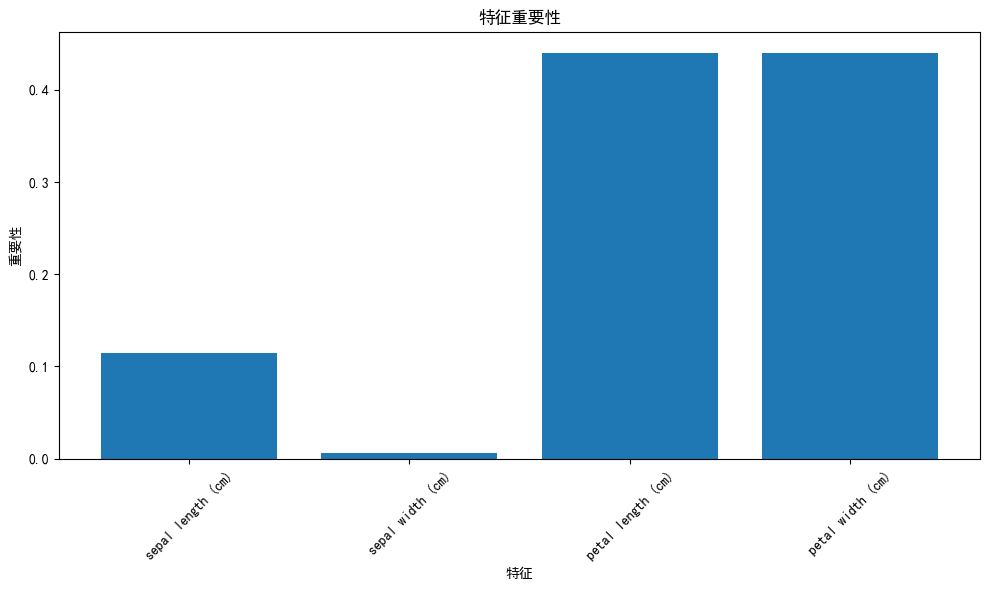

In [6]:
# 4. 模型训练
print("🤖 开始训练AI模型...")

# 创建随机森林分类器
rf_model = RandomForestClassifier(
    n_estimators=100,  # 树的数量
    max_depth=3,       # 树的最大深度
    random_state=42,   # 随机种子
    criterion='gini'   # 分裂准则
)

# 训练模型
rf_model.fit(X_train_scaled, y_train)

print("✅ 模型训练完成!")
print(f"模型参数: {rf_model.get_params()}")

# 特征重要性
feature_importance = rf_model.feature_importances_
print(f"\n📊 特征重要性:")
for i, (feature, importance) in enumerate(zip(feature_names, feature_importance)):
    print(f"{feature}: {importance:.4f}")

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title('特征重要性')
plt.xlabel('特征')
plt.ylabel('重要性')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📈 模型评估...
🎯 模型准确率: 0.9667 (96.67%)

📋 详细分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


🔢 混淆矩阵:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


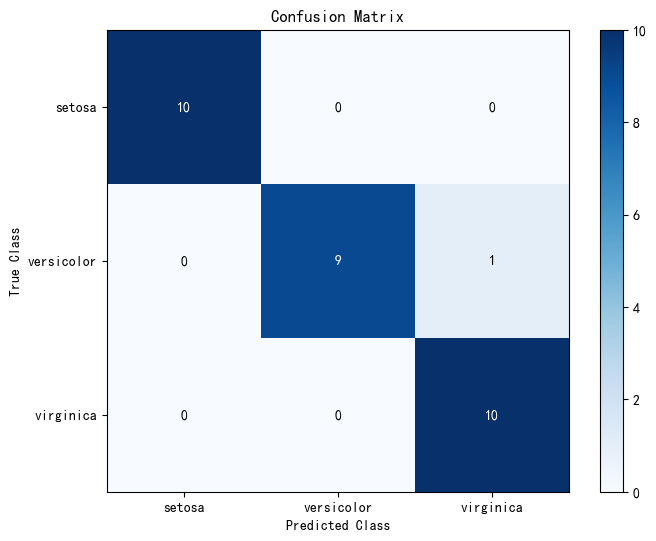

In [7]:
# 5. 模型评估
print("📈 模型评估...")

# 预测
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 模型准确率: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 分类报告
print(f"\n📋 详细分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(f"\n🔢 混淆矩阵:")
print(cm)

# 可视化混淆矩阵 (使用matplotlib替代seaborn)
plt.figure(figsize=(8, 6))
im = plt.imshow(cm, cmap='Blues')
plt.colorbar(im)
plt.xticks(range(len(target_names)), target_names)
plt.yticks(range(len(target_names)), target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# 添加数值标注
for i in range(len(target_names)):
    for j in range(len(target_names)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', 
                color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.show()


In [8]:
# 6. 模型预测示例
print("🔮 模型预测示例...")

# 创建一些示例数据
sample_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # setosa
    [6.2, 2.9, 4.3, 1.3],  # versicolor  
    [7.3, 2.9, 6.3, 1.8]   # virginica
])

print("📝 输入样本数据:")
for i, sample in enumerate(sample_data):
    print(f"样本 {i+1}: {sample}")

# 标准化样本数据
sample_scaled = scaler.transform(sample_data)

# 进行预测
predictions = rf_model.predict(sample_scaled)
prediction_proba = rf_model.predict_proba(sample_scaled)

print(f"\n🎯 预测结果:")
for i, (pred, proba) in enumerate(zip(predictions, prediction_proba)):
    predicted_species = target_names[pred]
    confidence = proba[pred] * 100
    print(f"样本 {i+1}: {predicted_species} (置信度: {confidence:.2f}%)")
    print(f"  各类别概率: {dict(zip(target_names, proba))}")
    print()


🔮 模型预测示例...
📝 输入样本数据:
样本 1: [5.1 3.5 1.4 0.2]
样本 2: [6.2 2.9 4.3 1.3]
样本 3: [7.3 2.9 6.3 1.8]

🎯 预测结果:
样本 1: setosa (置信度: 100.00%)
  各类别概率: {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(0.0), np.str_('virginica'): np.float64(0.0)}

样本 2: versicolor (置信度: 96.94%)
  各类别概率: {np.str_('setosa'): np.float64(0.0030000326288120243), np.str_('versicolor'): np.float64(0.9693707207497151), np.str_('virginica'): np.float64(0.027629246621472977)}

样本 3: virginica (置信度: 97.97%)
  各类别概率: {np.str_('setosa'): np.float64(0.0), np.str_('versicolor'): np.float64(0.020331876519376523), np.str_('virginica'): np.float64(0.9796681234806234)}



In [9]:
# 7. 模型保存和加载示例
print("💾 模型保存和加载...")

import joblib
import pickle

# 保存模型 (使用joblib - 推荐用于scikit-learn模型)
model_filename = 'iris_rf_model.joblib'
scaler_filename = 'iris_scaler.joblib'

joblib.dump(rf_model, model_filename)
joblib.dump(scaler, scaler_filename)

print(f"✅ 模型已保存到: {model_filename}")
print(f"✅ 标准化器已保存到: {scaler_filename}")

# 加载模型
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)

# 使用加载的模型进行预测
test_sample = np.array([[5.0, 3.4, 1.5, 0.2]]).reshape(1, -1)
test_sample_scaled = loaded_scaler.transform(test_sample)
prediction = loaded_model.predict(test_sample_scaled)
prediction_proba = loaded_model.predict_proba(test_sample_scaled)

print(f"\n🔄 使用加载的模型预测:")
print(f"输入: {test_sample[0]}")
print(f"预测: {target_names[prediction[0]]}")
print(f"置信度: {prediction_proba[0][prediction[0]]*100:.2f}%")

print(f"\n🎉 AI模型示例完成!")
print("=" * 50)


💾 模型保存和加载...
✅ 模型已保存到: iris_rf_model.joblib
✅ 标准化器已保存到: iris_scaler.joblib

🔄 使用加载的模型预测:
输入: [5.  3.4 1.5 0.2]
预测: setosa
置信度: 100.00%

🎉 AI模型示例完成!


## 🎯 AI模型示例总结

这个notebook展示了一个完整的机器学习工作流程：

### 📋 包含的步骤：
1. **数据加载和探索** - 加载鸢尾花数据集，查看数据基本信息
2. **数据可视化** - 通过多种图表了解数据分布和特征关系
3. **数据预处理** - 划分训练/测试集，特征标准化
4. **模型训练** - 使用随机森林分类器训练模型
5. **模型评估** - 计算准确率、分类报告、混淆矩阵
6. **模型预测** - 对新数据进行预测并显示置信度
7. **模型保存** - 保存训练好的模型供后续使用

### 🤖 使用的技术：
- **算法**: 随机森林分类器 (Random Forest)
- **数据**: 鸢尾花数据集 (经典机器学习数据集)
- **评估指标**: 准确率、精确率、召回率、F1分数
- **可视化**: matplotlib, seaborn
- **模型持久化**: joblib

### 💡 学习要点：
- 完整的ML工作流程
- 数据预处理的重要性
- 模型评估的方法
- 特征重要性的分析
- 模型保存和加载的最佳实践

这个示例适合机器学习初学者了解完整的建模流程！


In [10]:
# 🔧 可选：安装缺失的依赖包
# 如果你想要更美观的可视化，可以运行以下命令安装seaborn：

print("📦 依赖包安装指南:")
print("=" * 40)
print("如果需要安装seaborn以获得更美观的可视化效果，请运行:")
print()
print("方法1 - 使用pip:")
print("!pip install seaborn")
print()
print("方法2 - 使用conda:")
print("!conda install seaborn")
print()
print("方法3 - 在终端/命令提示符中:")
print("pip install seaborn")
print()
print("✅ 当前版本使用纯matplotlib，无需额外依赖!")
print("🎨 如果想要seaborn的样式，请先安装seaborn包")
print()
print("💡 提示: 如果仍然遇到问题，可以尝试:")
print("pip install --upgrade pip")
print("pip install seaborn matplotlib scikit-learn pandas numpy")


📦 依赖包安装指南:
如果需要安装seaborn以获得更美观的可视化效果，请运行:

方法1 - 使用pip:
!pip install seaborn

方法2 - 使用conda:
!conda install seaborn

方法3 - 在终端/命令提示符中:
pip install seaborn

✅ 当前版本使用纯matplotlib，无需额外依赖!
🎨 如果想要seaborn的样式，请先安装seaborn包

💡 提示: 如果仍然遇到问题，可以尝试:
pip install --upgrade pip
pip install seaborn matplotlib scikit-learn pandas numpy
